<a href="https://colab.research.google.com/github/itsdivya1309/Machine-Learning/blob/main/kNNClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**k-Nearest Neighbours**

To make a prediction for a
new data point, the algorithm finds the closest data points in the training dataset—its
“nearest neighbors.”

**k-Neighbours Classification**

------------------------------------------

**1. Importing Libraries and Dataset**


In [156]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [157]:
#importing dataset from kaggle
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [158]:
! kaggle datasets download -d wenruliu/adult-income-dataset

adult-income-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [159]:
! unzip adult-income-dataset.zip

Archive:  adult-income-dataset.zip
replace adult.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: adult.csv               


In [160]:
dataset = pd.read_csv("adult.csv")

In [161]:
dataset.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


All the required libraries and the dataset has been imported.

---

**2. Exploratory Data Analysis**


In [162]:
dataset.shape

(48842, 15)

In [163]:
dataset.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

income is the target variable. The rest are predictor variables.

In [164]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


*   Data has int values and object values.
*   No null values.

In [165]:
dataset.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [166]:
dataset.workclass.value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

Combining ?, Self-emp-not-inc, Without-pay, Never-worked as no-income group.

Also combining Loca-gov, Federal-gov and State-gov as gov.

In [167]:
dataset['workclass'].replace(to_replace = ['?','Self-emp-not-inc','Without-pay','Never-worked'], value = 'no-income',inplace = True)
dataset['workclass'].replace(to_replace = ['Local-gov','State-gov','Federal-gov'], value = 'gov',inplace = True)
dataset['workclass'].replace(to_replace = 'Self-emp-inc', value = 'Self', inplace = True)
dataset.workclass.value_counts()

Private      33906
no-income     6692
gov           6549
Self          1695
Name: workclass, dtype: int64

In [168]:
dataset.workclass.value_counts()

Private      33906
no-income     6692
gov           6549
Self          1695
Name: workclass, dtype: int64

In [169]:
dataset.education.value_counts()

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

educational-num has ordinally encoded the education column.

So, we can remove the education column but, before that we need to see the correlation.





In [170]:
dataset.groupby('education')['educational-num'].unique().sort_values()
#here is a encoded number for each education.

education
Preschool        [1]
1st-4th          [2]
5th-6th          [3]
7th-8th          [4]
9th              [5]
10th             [6]
11th             [7]
12th             [8]
HS-grad          [9]
Some-college    [10]
Assoc-voc       [11]
Assoc-acdm      [12]
Bachelors       [13]
Masters         [14]
Prof-school     [15]
Doctorate       [16]
Name: educational-num, dtype: object

In [171]:
dataset['marital-status'].value_counts()

Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital-status, dtype: int64

In [172]:
dataset.occupation.value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

There are null values in occupation in the form of ?.

Combining Other-service and ? -> Other

In [173]:
dataset['occupation'].replace(to_replace = ['?','Other-service'], value = 'Other', inplace = True)
dataset.occupation.value_counts()

Other                7732
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [174]:
dataset.relationship.value_counts()

Husband           19716
Not-in-family     12583
Own-child          7581
Unmarried          5125
Wife               2331
Other-relative     1506
Name: relationship, dtype: int64

relationship column doesn't seem to be of much relevance, so I might remove it later.

In [175]:
dataset.race.value_counts()

White                 41762
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: race, dtype: int64

In [176]:
dataset.gender.value_counts()

Male      32650
Female    16192
Name: gender, dtype: int64

In [182]:
dataset['native-country'].value_counts()

United-States         43832
Other_country          1632
Mexico                  951
Philippines             295
Germany                 206
Puerto-Rico             184
Canada                  182
El-Salvador             155
India                   151
Cuba                    138
England                 127
China                   122
South                   115
Jamaica                 106
Italy                   105
Dominican-Republic      103
Japan                    92
Guatemala                88
Poland                   87
Vietnam                  86
Columbia                 85
Name: native-country, dtype: int64

I don't think these many countries are of any help, one thing we can do is group them either by their continents or by demographics. But that's a tidius task. So, let's first take a look at their relation with income and then I'll see.

In [181]:
dataset['native-country'].replace(to_replace=['?','Haiti','Portugal','Taiwan','Iran','Greece','Nicaragua','Peru','Ecuador','France','Ireland','Hong','Thailand','Cambodia ','Trinadad&Tobago','Laos','Cambodia','Yugoslavia','Outlying-US(Guam-USVI-etc)','Scotland','Honduras','Hungary','Holand-Netherlands'], value='Other_country',inplace=True )

In [183]:
dataset.income.value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

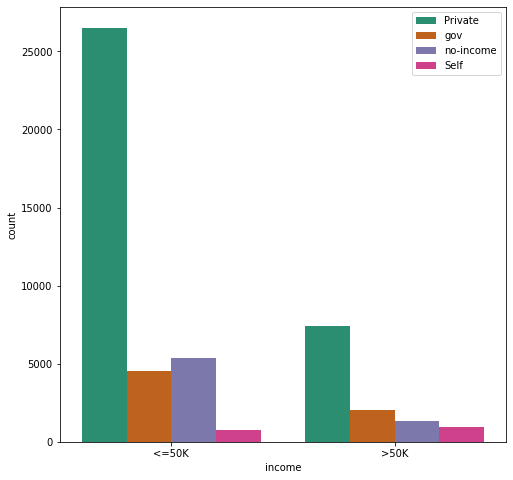

In [184]:
plt.figure(figsize=(8,8))
sns.countplot(x='income',hue='workclass',data=dataset,palette='Dark2')
plt.legend(loc='best')
plt.show()

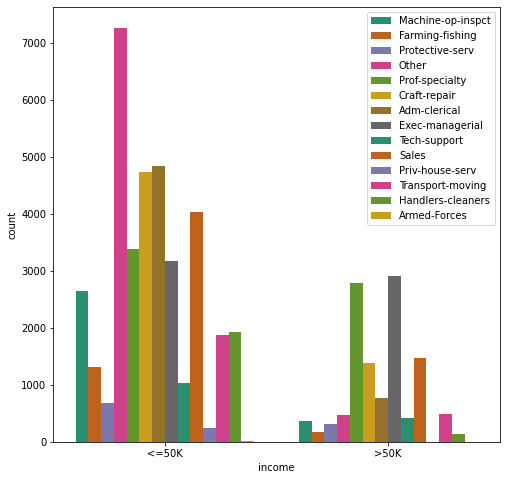

In [185]:
plt.figure(figsize=(8,8))
sns.countplot(x='income',hue='occupation',data=dataset,palette='Dark2')
plt.legend(loc='best')
plt.show()

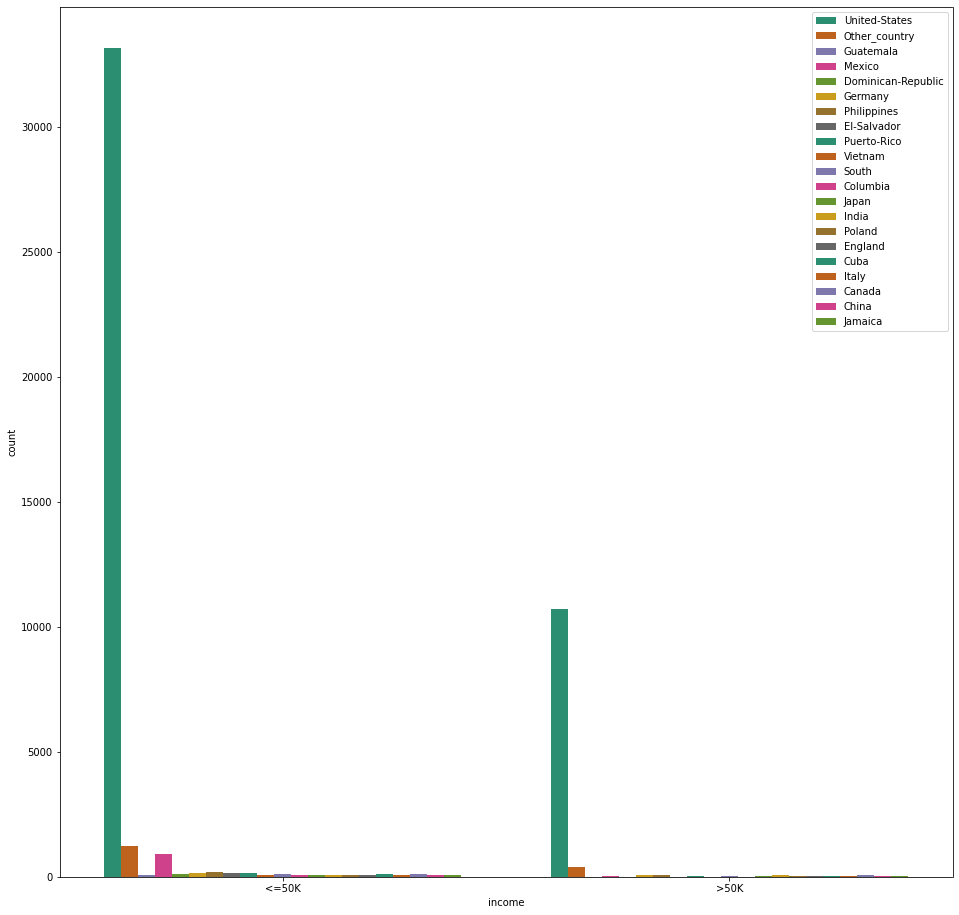

In [186]:
plt.figure(figsize=(16,16))
sns.countplot(x='income',hue='native-country',data=dataset,palette='Dark2')
plt.legend(loc='best')
plt.show()

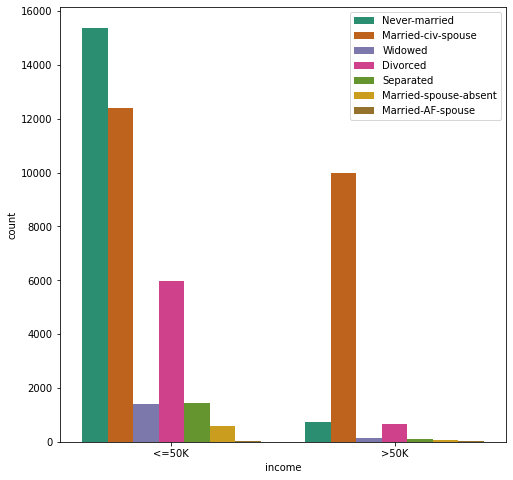

In [187]:
plt.figure(figsize=(8,8))
sns.countplot(x='income',hue='marital-status',data=dataset,palette='Dark2')
plt.legend(loc='best')
plt.show()

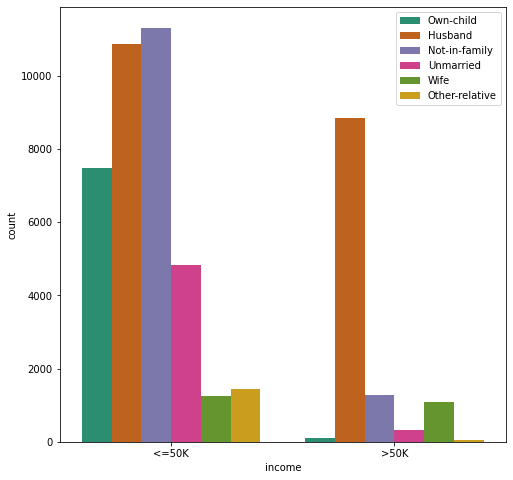

In [188]:
plt.figure(figsize=(8,8))
sns.countplot(x='income',hue='relationship',data=dataset,palette='Dark2')
plt.legend(loc='best')
plt.show()

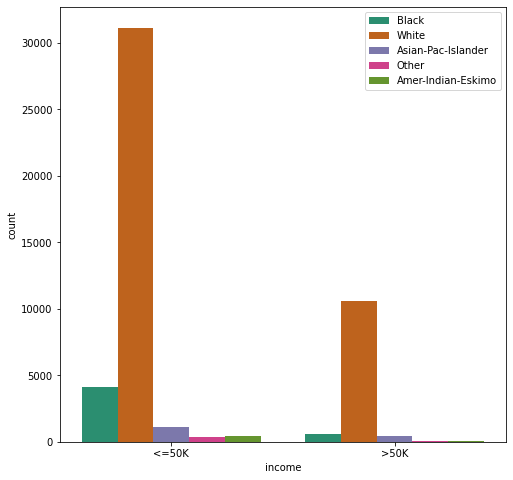

In [189]:
plt.figure(figsize=(8,8))
sns.countplot(x='income',hue='race',data=dataset,palette='Dark2')
plt.legend(loc='best')
plt.show()

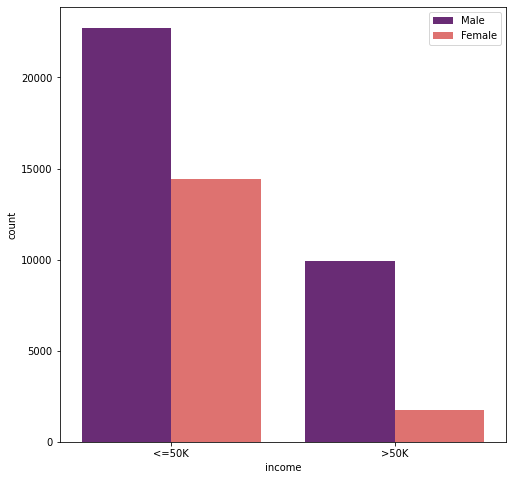

In [190]:
plt.figure(figsize=(8,8))
sns.countplot(x='income',hue='gender',data=dataset,palette='magma')
plt.legend(loc='best')
plt.show()

In [191]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


**3. Category Encoding**

education is already encoded in the educational-num column.

So, I'm left with

*   workclass
*   marital-status
*   occupation
*   relationship
*   race
*   gender
*   native-country
*   income(target variable)

All these are categorical column whereas the education is ordinal data.

income is a binary feature, so it can be encoded by simple replace() method. 

In [192]:
data = dataset.drop(columns = ['education','relationship'])
data['income'].replace({'<=50K':0,'>50K':1},inplace=True)
data.income.value_counts()

0    37155
1    11687
Name: income, dtype: int64

The rest of the features are nominal so they need to be encoded using one-hot encoding.

In [193]:
data = pd.get_dummies(data,columns = ['workclass','marital-status','occupation','race','gender','native-country'])

In [194]:
data.head(10)

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income,workclass_Private,workclass_Self,workclass_gov,...,native-country_Jamaica,native-country_Japan,native-country_Mexico,native-country_Other_country,native-country_Philippines,native-country_Poland,native-country_Puerto-Rico,native-country_South,native-country_United-States,native-country_Vietnam
0,25,226802,7,0,0,40,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,38,89814,9,0,0,50,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,28,336951,12,0,0,40,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,44,160323,10,7688,0,40,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,18,103497,10,0,0,30,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,34,198693,6,0,0,30,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
6,29,227026,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7,63,104626,15,3103,0,32,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8,24,369667,10,0,0,40,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
9,55,104996,4,0,0,10,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [195]:
data.shape

(48842, 60)

In [196]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 60 columns):
 #   Column                                Non-Null Count  Dtype
---  ------                                --------------  -----
 0   age                                   48842 non-null  int64
 1   fnlwgt                                48842 non-null  int64
 2   educational-num                       48842 non-null  int64
 3   capital-gain                          48842 non-null  int64
 4   capital-loss                          48842 non-null  int64
 5   hours-per-week                        48842 non-null  int64
 6   income                                48842 non-null  int64
 7   workclass_Private                     48842 non-null  uint8
 8   workclass_Self                        48842 non-null  uint8
 9   workclass_gov                         48842 non-null  uint8
 10  workclass_no-income                   48842 non-null  uint8
 11  marital-status_Divorced               488

I am done playing with the data. Now, let's train our model.


---

**4. Splitting into train and test data**

In [197]:
from sklearn.model_selection import train_test_split
y = np.array(data.income).reshape(-1,1)
X = data.drop(columns = 'income',axis=1)

In [198]:
y.shape

(48842, 1)

In [199]:
X.columns

Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'workclass_Private', 'workclass_Self',
       'workclass_gov', 'workclass_no-income', 'marital-status_Divorced',
       'marital-status_Married-AF-spouse', 'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent', 'marital-status_Never-married',
       'marital-status_Separated', 'marital-status_Widowed',
       'occupation_Adm-clerical', 'occupation_Armed-Forces',
       'occupation_Craft-repair', 'occupation_Exec-managerial',
       'occupation_Farming-fishing', 'occupation_Handlers-cleaners',
       'occupation_Machine-op-inspct', 'occupation_Other',
       'occupation_Priv-house-serv', 'occupation_Prof-specialty',
       'occupation_Protective-serv', 'occupation_Sales',
       'occupation_Tech-support', 'occupation_Transport-moving',
       'race_Amer-Indian-Eskimo', 'race_Asian-Pac-Islander', 'race_Black',
       'race_Other', 'race_White', 'gender_Female',

In [200]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.10,random_state=0)

**5. Creating and training the model**

In [201]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)

In [202]:
model.fit(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [203]:
train_pred = model.predict(X_train)

In [204]:
y_pred = model.predict(X_test).reshape(-1,1)

In [205]:
print(y_pred.shape)

(4885, 1)


In [206]:
X_train.shape

(43957, 59)

**6. Testing the accuracy of the model**

In [207]:
score = model.score(X_test,y_test)

In [208]:
print('Test set accuracy : {:.3f}'.format(score))

Test set accuracy : 0.763


In [210]:
from sklearn.metrics import accuracy_score

In [211]:
print('Accuracy of the model on training set is : \n',accuracy_score(train_pred,y_train))

Accuracy of the model on training set is : 
 0.8708965579998635


In [212]:
print('Accuracy of the model on training set is : \n',accuracy_score(y_pred,y_test))

Accuracy of the model on training set is : 
 0.7625383828045036


Since the accuracy of the model on test set is close to its accuracy on training data, I can say that the model has generalised:)